# MEGI001-2101033 Introduction to Earth System Data

## Task 5.2 - Data Handling Analysis

Created on: Jan 23, 2019 by Ralph Florent <r.florent@jacobs-university.de>

## T 5.2 - Time series & some stats

Download some time series cyclical data (e.g. temperature on HDF5 dataset - see lectures 3 and 4) and fit sinusoidal function to it (use google for inspiration).

Hint: use least squares regression - [https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html).

See also 
https://github.com/ltauxe/Python-for-Earth-Science-Students/blob/master/Lecture_26_time_series.ipynb
    

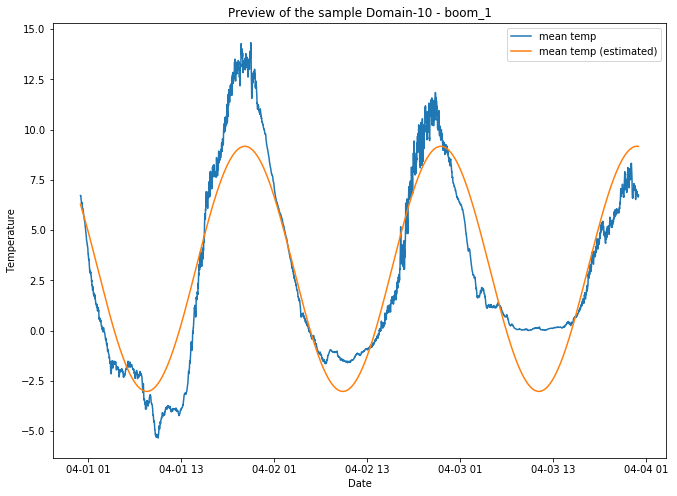

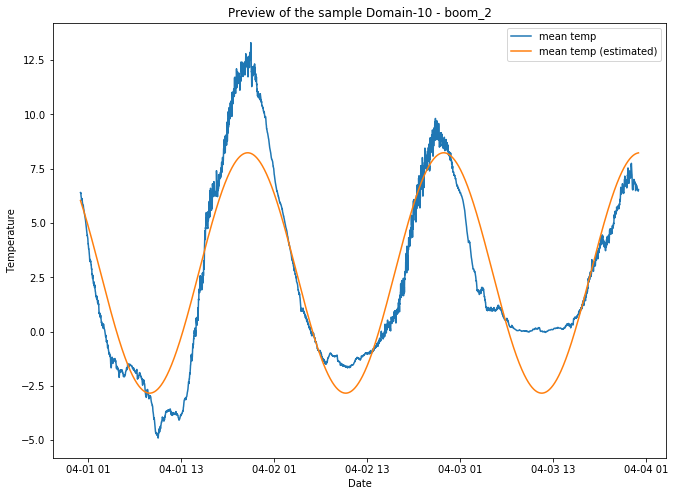

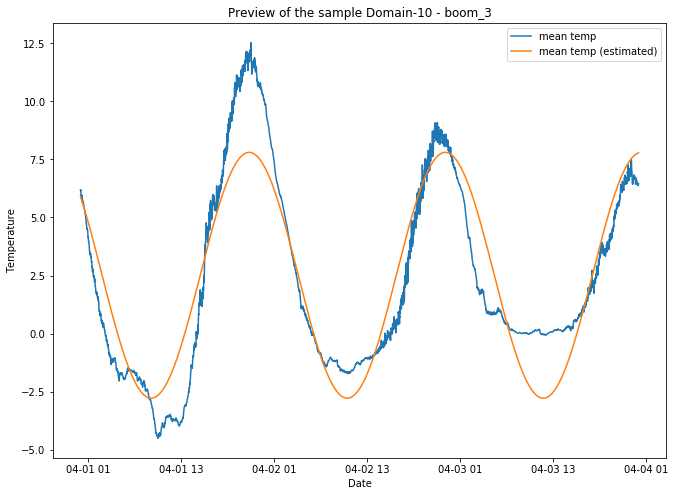

In [30]:
# -*- coding: utf-8 -*-
"""
Created on Jan 23 2019

@author: Angelo Rossi, Ralph Florent
"""
# Import relevant libraries
import h5py
import math
import time
import numpy as np

from datetime import datetime
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import leastsq

# define file path to load data from file
path = '../assets/data/hdf/'
filename = 'data-file@task4.3.hdf5'

# load and show data from hdf5 source
filepath = path + filename
file = h5py.File(filepath, 'r')
# create the sine modeling function for the regression
# Function inspired by Asad Ahmed <as.ahmed@jacobs-university.de>
def sin_regression(x, y):
    # parameterized Eq: y = Asin(Bx+C)+D
    
    # convert datetime array to nparray of floats
    x1 = np.array([time.mktime(val.timetuple()) for val in x])
    x2 = np.interp(x1, (x1.min(), x1.max()), (-2*math.pi, 2*math.pi))
    
    # set up initial estimates for parameters
    A, B, C, D = np.mean(y), 1.0, 1.0, 5.0
    
    # optimisation func - sin regression params order: (A, B, C, D)
    optimzation_func = lambda x: x[0] * np.sin(x[1]*x2 + x[2]) + x[3] - y
    
    # perform sin regression using least squares
    A_HAT, B_HAT, C_HAT, D_HAT = leastsq(optimzation_func, [A, B, C, D])[0]
    y_hat = A_HAT * np.sin(B_HAT * x2 + C_HAT) + D_HAT
    
    return y_hat

# Distribute the data between date and mean and fit sin model
def plot_figure(dataset, plot_title):
    sample_date_mean = dataset['date', 'mean']
    dates = [x[0] for x in sample_date_mean]
    temps = [y[1] for y in sample_date_mean]
    datesStr = ["".join([chr(y) for y in x[:-2]]) for x in dates]
    times = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in datesStr]
    
    temps_hat = sin_regression(times, temps)
    
    plt.figure(figsize=(11, 8))
    plt.plot(times, temps, label='mean temp')
    plt.plot(times, temps_hat, label='mean temp (estimated)')
    plt.title(plot_title)
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend(loc='best')
    plt.show()

# Plot the data for min_1

for el in list(file['Domain_10']['STER']['min_1']):
    ds = file['Domain_10']['STER']['min_1'][el]['temperature']
    plot_figure(ds, 'Preview of the sample Domain-10 - ' + el)